In [1]:
# Cameron Schultz 
# ckschult@usc.edu
# Github: ckschultz

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy
from scipy.stats import bootstrap

# from sklearn import neighbors 
# from sklearn.neighbors import KNeighborsRegressor, DistanceMetric
# from sklearn import preprocessing
# from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.utils import shuffle 
# from sklearn.metrics import classification_report, confusion_matrix, precision_score
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

**DATA PREP AND READING THE DATA**

In [3]:
# INITIALIZE FILEPATHS
bend1fp = '../data/AReM/bending1/'
bend2fp = '../data/AReM/bending2/'
cyclingfp = '../data/AReM/cycling/'
lyingfp = '../data/AReM/lying/'
sittingfp = '../data/AReM/sitting/'
standingfp = '../data/AReM/standing/'
walkingfp = '../data/AReM/walking/'

# INITIALIZE DATAFRAMES

bend1test = pd.DataFrame()
bend2test = pd.DataFrame()
cyclingtest = pd.DataFrame()
lyingtest = pd.DataFrame()
sittingtest = pd.DataFrame()
standingtest = pd.DataFrame()
walkingtest = pd.DataFrame()

bend1train = pd.DataFrame()
bend2train = pd.DataFrame()
cyclingtrain = pd.DataFrame()
lyingtrain = pd.DataFrame()
sittingtrain = pd.DataFrame()
standingtrain = pd.DataFrame()
walkingtrain = pd.DataFrame()


In [4]:
# INITIALIZE STATS ARRAYS FOR STATS DF 
min1 = []
max1 = []
mean1 = []
median1 = []
std1 = []
fq1 = []
tq1 = []

min2 = []
max2 = []
mean2 = []
median2 = []
std2 = []
fq2 = []
tq2 = []

min3 = []
max3 = []
mean3 = []
median3 = []
std3 = []
fq3 = []
tq3 = []

min4 = []
max4 = []
mean4 = []
median4 = []
std4 = []
fq4 = []
tq4 = []

min5 = []
max5 = []
mean5 = []
median5 = []
std5 = []
fq5 = []
tq5 = []

min6 = []
max6 = []
mean6 = []
median6 = []
std6 = []
fq6 = []
tq6 = []

In [5]:
# FIND STATS FUNCTION
def findstats(df):
    max1.append(df['avg_rss12'].max())
    min1.append(df['avg_rss12'].min())
    mean1.append(df['avg_rss12'].mean())
    median1.append(df['avg_rss12'].median())
    std1.append(df['avg_rss12'].std())
    fq1.append(df['avg_rss12'].quantile(q=0.25))
    tq1.append(df['avg_rss12'].quantile(q=0.75))

    max2.append(df['var_rss12'].max())
    min2.append(df['var_rss12'].min())
    mean2.append(df['var_rss12'].mean())
    median2.append(df['var_rss12'].median())
    std2.append(df['var_rss12'].std())
    fq2.append(df['var_rss12'].quantile(q=0.25))
    tq2.append(df['var_rss12'].quantile(q=0.75))

    max3.append(df['avg_rss13'].max())
    min3.append(df['avg_rss13'].min())
    mean3.append(df['avg_rss13'].mean())
    median3.append(df['avg_rss13'].median())
    std3.append(df['avg_rss13'].std())
    fq3.append(df['avg_rss13'].quantile(q=0.25))
    tq3.append(df['avg_rss13'].quantile(q=0.75))

    max4.append(df['var_rss13'].max())
    min4.append(df['var_rss13'].min())
    mean4.append(df['var_rss13'].mean())
    median4.append(df['var_rss13'].median())
    std4.append(df['var_rss13'].std())
    fq4.append(df['var_rss13'].quantile(q=0.25))
    tq4.append(df['var_rss13'].quantile(q=0.75))

    max5.append(df['avg_rss23'].max())
    min5.append(df['avg_rss23'].min())
    mean5.append(df['avg_rss23'].mean())
    median5.append(df['avg_rss23'].median())
    std5.append(df['avg_rss23'].std())
    fq5.append(df['avg_rss23'].quantile(q=0.25))
    tq5.append(df['avg_rss23'].quantile(q=0.75))

    max6.append(df['var_rss23'].max())
    min6.append(df['var_rss23'].min())
    mean6.append(df['var_rss23'].mean())
    median6.append(df['var_rss23'].median())
    std6.append(df['var_rss23'].std())
    fq6.append(df['var_rss23'].quantile(q=0.25))
    tq6.append(df['var_rss23'].quantile(q=0.75))




In [6]:
# READ FILES, CREATE DATAFRAMES
def createdf(filepath, startfile, endfile, initdf):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        findstats(tempdf)
        initdf = pd.concat([initdf, tempdf])
    return initdf

**B) SEPARATE TEST AND TRAINING DATA**

In [7]:
# CREATE TEST DATA 
bend1test = createdf(bend1fp, 1, 2, bend1test)
bend2test = createdf(bend2fp, 1, 2, bend2test)
cyclingtest = createdf(cyclingfp, 1, 3, cyclingtest)
lyingtest = createdf(lyingfp, 1, 3, lyingtest)
sittingtest = createdf(sittingfp, 1, 3, sittingtest)
standingtest = createdf(standingfp, 1, 3, standingtest)
walkingtest = createdf(walkingfp, 1, 3, walkingtest)

# CREATE TRAINING DATA
bend1train = createdf(bend1fp, 3, 7, bend1train)
bend2train = createdf(bend2fp, 3, 6, bend2train)
cyclingtrain = createdf(cyclingfp, 4, 15, cyclingtrain)
lyingtrain = createdf(lyingfp, 4, 15, lyingtrain)
sittingtrain = createdf(sittingfp, 4, 15, sittingtrain)
standingtrain = createdf(standingfp, 4, 15, standingtrain)
walkingtrain = createdf(walkingfp, 4, 15, walkingtrain)

testingdf = pd.concat([bend1test, bend2test, cyclingtest, lyingtest, sittingtest, standingtest, walkingtest])
trainingdf = pd.concat([bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain])

In [8]:
# CHECK DIMENSIONS
print("Testing data:", testingdf.shape)
print("Training data:", trainingdf.shape)

Testing data: (9120, 7)
Training data: (33119, 7)


**C) FEATURE EXTRACTION**

**i)**
Some features of classifying time-series data include:

Mean, standard deviations, skewness and kurtosis, quartiles and interquartile ranges, as well as maximum and minimum values. 

**ii) Extracting Domain Features**


**FEATURE TABLE**

In [9]:
instances = []
for i in range(1, len(max1)+1):
    instances.append(i)
    
statsDict = {'Instance': instances,
            'min1':min1, 'max1':max1, 'mean1':mean1, 'median1':median1, 'standard_deviation_1': std1, 'first_quartile1':fq1,'third_quartile1':tq1,
            'min2':min2, 'max2':max2, 'mean2':mean2, 'median2':median2, 'standard_deviation_2': std2, 'first_quartile2':fq2,'third_quartile2':tq2,
            'min3':min3, 'max3':max3, 'mean3':mean3, 'median3':median3, 'standard_deviation_3': std3, 'first_quartile3':fq3,'third_quartile3':tq3,
            'min4':min4, 'max4':max4, 'mean4':mean4, 'median4':median4, 'standard_deviation_4': std4, 'first_quartile4':fq4,'third_quartile4':tq4,
            'min5':min5, 'max5':max5, 'mean5':mean5, 'median5':median5, 'standard_deviation_5': std5, 'first_quartile5':fq5,'third_quartile5':tq5,
            'min6':min6, 'max6':max6, 'mean6':mean6, 'median6':median6, 'standard_deviation_6': std6, 'first_quartile6':fq6,'third_quartile6':tq6    
            }
statsDf = pd.DataFrame(statsDict)
statsDf

,Instance,min1,max1,mean1,median1,standard_deviation_1,first_quartile1,third_quartile1,min2,max2,...,standard_deviation_5,first_quartile5,third_quartile5,min6,max6,mean6,median6,standard_deviation_6,first_quartile6,third_quartile6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.0000,0.0,1.30,...,2.188449,33.00,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,2,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.6700,0.0,1.22,...,1.995255,32.00,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,3,12.75,51.00,24.562958,24.25,3.737514,23.1875,26.5000,0.0,6.87,...,3.693786,20.50,27.00,0.00,4.97,0.700188,0.50,0.693720,0.4300,0.8700
3,4,0.00,42.75,27.464604,28.00,3.583582,25.5000,30.0000,0.0,7.76,...,5.053642,15.00,20.75,0.00,6.76,1.122125,0.83,1.012342,0.4700,1.3000
4,5,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.2500,0.0,8.58,...,2.890347,17.95,21.75,0.00,9.34,2.921729,2.50,1.852600,1.5000,3.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.2500,37.0000,0.0,14.67,...,3.283983,13.73,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,85,19.75,45.50,34.322750,35.25,4.752477,31.0000,38.0000,0.0,13.47,...,3.119856,13.50,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,86,19.50,46.00,34.546229,35.25,4.842294,31.2500,37.8125,0.0,12.47,...,2.823124,14.00,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,87,23.50,46.25,34.873229,35.25,4.531720,31.7500,38.2500,0.0,14.82,...,3.131076,13.75,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


**iii) STANDARD DEVIATION ESTIMATION & CONFIDENCE INTERVALS**

In [17]:
stdDict = {'INSTANCE': ["STD DEV", "90% CONFIDENCE INT."]}
rng = np.random.default_rng()

for key in statsDf:
    if key != 'Instance':
        tempData = (statsDf[key],)
        interval = bootstrap(tempData, np.std, confidence_level=0.9, random_state=rng, method='basic')
        stdDict[key] = [statsDf[key].std(), interval.confidence_interval]
    
stdDf = pd.DataFrame(stdDict).transpose()
stdDf
# print(stdDict)




,0,1
INSTANCE,STD DEV,90% CONFIDENCE INT.
min1,9.569975,"(8.3308439851585, 10.82632641230356)"
max1,4.394362,"(3.480880923013255, 5.436720198385615)"
mean1,5.335718,"(4.7685797066889, 5.946255104109188)"
median1,5.440054,"(4.846838082111524, 6.053835967942617)"
standard_deviation_1,1.772153,"(1.5865647165829093, 1.9683952577740886)"
first_quartile1,6.15359,"(5.6333252246142935, 6.693671778240653)"
third_quartile1,5.138925,"(4.426548162920232, 5.923717323522471)"
min2,0.0,"(0.0, 0.0)"
max2,5.062729,"(4.687710001466774, 5.474670444082135)"


**MOST IMPORTANT TIME-DOMAIN FEATURES**

In [11]:
mins = []
maxes = []
means = []
meds = []
fir = []
third = []
stdss = []
xaxis = [1, 2, 3, 4, 5, 6]
stds = stdDf[0]

for i in range(1, len(stds)):
    if i%7 == 1:
        mins.append(stdDf[0][i])
    elif i%7 == 2:
        maxes.append(stdDf[0][i])
    elif i%7 == 3:
        means.append(stdDf[0][i])
    elif i%7 == 4:
        meds.append(stdDf[0][i])
    elif i%7 == 5:
        stdss.append(stdDf[0][i])
    elif i%7 == 6:
        fir.append(stdDf[0][i])
    else:
        third.append(stdDf[0][i])

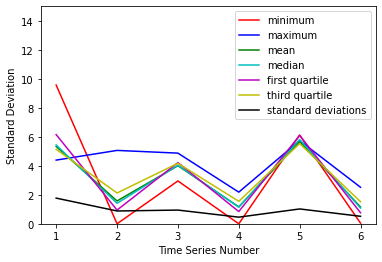

In [12]:
plt.plot(xaxis, mins, 'r', label='minimum')
plt.plot(xaxis, maxes, 'b', label='maximum')
plt.plot(xaxis, means, 'g', label='mean')
plt.plot(xaxis, meds, 'c', label='median')
plt.plot(xaxis, fir, 'm', label='first quartile')
plt.plot(xaxis, third, 'y', label='third quartile')
plt.plot(xaxis, stdss, 'k', label='standard deviations')
plt.ylim(0, 15)
plt.legend(loc="upper right")
plt.xlabel("Time Series Number")
plt.ylabel("Standard Deviation")
plt.show()


Standard deviation is a measure of how data is structured around the mean of the sample. In general, lower standard deviations signify data is more 'reliable' and less variable. We may assume, in our case, that features with a lower standard deviation are more accurate and reliable predictors. As we can see from the plot above, the statistical features with the lowest standard deviations are standard deviations, minimums, and first quartiles. However, minimum values, though they have a low standard deviation in our sample, may not be the most important time-domain feature. As we can see from our Feature Table in section C ii), many instances have a min of 0, as the cutoff of our measurements/observations is 0 (observations cannot be negative). In general, min measurements are fairly susceptible to outliers, and our minimums may have artificially low standard deviations as they cannot drop below 0, and therefore it is possible that they are not a good representative time-domain features. Alternatively, medians can be reliable statistical features to consider because they control for, and are less influenced by, outliers. In our plot, median also has the 4th lowest standard deviation out of all the features. 

Therefore, I would consider our most important time-domain features to be standard deviation, first quartiles, and medians. 

**ISLR 3.7.4**

a) There may not be enough information to tell. This is because the cubic regression may be more flexible, and therefore it may fit the natrual variance of our data points more closely than even the linear regression. However, if the true relationship is linear and there is not much variance in our data, it is possible for the RSS for the (more accurate) linear model to be smaller. There could be justifications for either model. 

b) The RSS for the linear model on the test data will have a lower RSS. This is because the true relationship between X and Y is linear, and therefore it will be best modeled with a linear regression. All of the minimized error that resulted from fitting a more flexible cubic model to the training dataset will no longer be present in the test data, and therefore the RSS of the linear model will be lower. 

c) We would expect the RSS for the cubic model to be lower because it is a more flexible model, and therefore more likely to be a better fit. There still may be the chance that the true relationship is not far at all from a linear relationship, and the linear model could still be a better fit. However, in general, if we know that the true relationship is not linear, it is more likely that the cubic model will have the lower RSS since it can track and fit to the data more closely. 

d) We can't say for sure and may need more information. If the true relationship was closer to linear, then we would expect the linear RSS to be lower. Alternatively, if the true relationship is far from linear, we would expect the cubic RSS to be lower. Without knowing the actual relationship, it is hard to say which model will better fit/predict the data. 


it is more likely that the model which trains and fits closer to the training data set will be a better predictor than a more restricted linear model. 